<a href="https://colab.research.google.com/github/FayyazShaikh98/FayyazShaikh98/blob/main/IMDB_webscreping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project on IMDB Top Movies

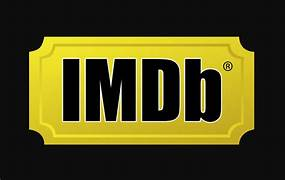

### Introduction : In this project, I developed a web scraper using Python and the BeautifulSoup library to extract data from IMDb. The goal was to collect the titles of the top 25 movies as ranked by user ratings. By accessing the IMDb search page for the top 25 movies and parsing the HTML content, the script successfully navigates through the page structure to retrieve and display the movie titles. This project demonstrates the practical application of web scraping techniques to automate data collection from a dynamic website, which can be useful for various data analysis and research purposes.

### Let's Start

### Import libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re

### Getting started  with web scraping of IMDB Movies

In [2]:
# Getting a imdb_url to parse the html code
imdb_url = 'https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc'
HEADERS = ({'User-Agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36",'Accept-Language': 'en-US, en;q=0.5'})
imdb_response = requests.get(imdb_url, headers=HEADERS)

In [3]:
# using soup to get html code
soup = BeautifulSoup(imdb_response.text, 'html.parser')

In [ ]:
# Soup will give all the html code of whole url page
soup

### Task 1: Getting movie titles

In [5]:
# Creating a variable movie_elemenets to get all the movie titles.
movie_elements = soup.find_all('li', attrs={'class': 'ipc-metadata-list-summary-item'})

# Initialize an empty list to store cleaned movie names
cleaned_movie_names = []

# Loop through each movie element, extract the name, and clean it
for movie in movie_elements:
    movie_name = movie.find('h3', attrs={'class': 'ipc-title__text'}).text
    movie_name_cleaned = re.sub(r'\d+\.', '', movie_name).strip()  # Remove numbers and dot
    cleaned_movie_names.append(movie_name_cleaned)

# Print all cleaned movie names
for name in cleaned_movie_names:
    print(name)

The Shawshank Redemption
The Godfather
The Dark Knight
Schindler's List
The Lord of the Rings: The Return of the King
12 Angry Men
The Godfather Part II
The Lord of the Rings: The Fellowship of the Ring
Pulp Fiction
12th Fail
Inception
Fight Club
Forrest Gump
The Good, the Bad and the Ugly
The Lord of the Rings: The Two Towers
Interstellar
The Matrix
Goodfellas
One Flew Over the Cuckoo's Nest
Star Wars: Episode V - The Empire Strikes Back
Dune: Part Two
The Silence of the Lambs
Se7en
The Green Mile
Spider-Man: Across the Spider-Verse


### Task 2: Getting release year

In [26]:
# By creating a variable release_year i had passed the (span) tags which gives the release year of the movies
release_year = soup.find_all('li', attrs ={'class': 'ipc-metadata-list-summary-item'})[0].find_all('span',attrs = {'class': 'sc-b189961a-8 hCbzGp dli-title-metadata-item'})[0].text

In [27]:
release_year

'1994'

In [28]:
release_year = []
for i in soup.find_all('li', attrs ={'class': 'ipc-metadata-list-summary-item'}):
    release_year.append(i.find_all('span',attrs = {'class': 'sc-b189961a-8 hCbzGp dli-title-metadata-item'})[0].text)

In [29]:
release_year

['1994',
 '1972',
 '2008',
 '1993',
 '2003',
 '1957',
 '1974',
 '2001',
 '1994',
 '2023',
 '2010',
 '1999',
 '1994',
 '1966',
 '2002',
 '2014',
 '1999',
 '1990',
 '1975',
 '1980',
 '2024',
 '1991',
 '1995',
 '1999',
 '2023']

### Task 3: Movie Runtime/Duration

In [45]:
# Getting movie runtime/duration
runtime = soup.find_all('li', attrs ={'class': 'ipc-metadata-list-summary-item'})[0].find_all('span',attrs = {'class': 'sc-b189961a-8 hCbzGp dli-title-metadata-item'})[1].text

In [47]:
runtimes = []
for i in soup.find_all('li', attrs ={'class': 'ipc-metadata-list-summary-item'}):
    runtimes.append(i.find_all('span',attrs = {'class': 'sc-b189961a-8 hCbzGp dli-title-metadata-item'})[1].text)

In [48]:
runtimes

['2h 22m',
 '2h 55m',
 '2h 32m',
 '3h 15m',
 '3h 21m',
 '1h 36m',
 '3h 22m',
 '2h 58m',
 '2h 34m',
 '2h 27m',
 '2h 28m',
 '2h 19m',
 '2h 22m',
 '2h 58m',
 '2h 59m',
 '2h 49m',
 '2h 16m',
 '2h 25m',
 '2h 13m',
 '2h 4m',
 '2h 46m',
 '1h 58m',
 '2h 7m',
 '3h 9m',
 '2h 20m']

### Task 4: Rating of movies

In [49]:
# Getting imdb_rating of movies
rating =  soup.find('span', class_='ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating').text.strip().split()[0]

In [55]:
movie_ratings = []
for i in soup.find_all('span', attrs = {'class': 'ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating'}):
    movie_ratings.append(i.text.strip().split()[0])

In [56]:
movie_ratings

['9.3',
 '9.2',
 '9.0',
 '9.0',
 '9.0',
 '9.0',
 '9.0',
 '8.9',
 '8.9',
 '8.9',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6']

### Task 5: Number of Views

In [65]:
# Getting Number of views
views=  soup.find_all('li', attrs = {'class' : 'ipc-metadata-list-summary-item'})[0].find_all('span', attrs = {'class': 'ipc-rating-star--voteCount'})[0].text.strip().replace("(", "").replace(")", "")

In [71]:
views = []
for i in soup.find_all('li', attrs = {'class' : 'ipc-metadata-list-summary-item'}):
    views.append(i.find_all('span', attrs = {'class': 'ipc-rating-star--voteCount'})[0].text.strip().replace("(", "").replace(")", ""))

In [72]:
views

['2.9M',
 '2M',
 '2.9M',
 '1.5M',
 '2M',
 '876K',
 '1.4M',
 '2M',
 '2.2M',
 '123K',
 '2.6M',
 '2.4M',
 '2.3M',
 '819K',
 '1.8M',
 '2.1M',
 '2.1M',
 '1.3M',
 '1.1M',
 '1.4M',
 '482K',
 '1.6M',
 '1.8M',
 '1.4M',
 '388K']

### Task 6: Movie Description

In [73]:
# Scrapeing the movie description
movies_description = soup.find_all('li', attrs = {'class': 'ipc-metadata-list-summary-item'})[0].find_all('div', attrs = {'class': 'ipc-html-content-inner-div'})[0].text.strip()

In [74]:
movies_description = []
for i in soup.find_all('li', attrs = {'class': 'ipc-metadata-list-summary-item'}):
    movies_description.append(i.find_all('div', attrs = {'class': 'ipc-html-content-inner-div'})[0].text.strip())

In [75]:
movies_description

['Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.',
 'Don Vito Corleone, head of a mafia family, decides to hand over his empire to his youngest son, Michael. However, his decision unintentionally puts the lives of his loved ones in grave danger.',
 'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.',
 'In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce after witnessing their persecution by the Nazis.',
 "Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.",
 'The jury in a New York City murder trial is frustrated by a single member whose skeptical caution forces them to more carefully c

### Task 7: Movie Links

In [77]:
# Getting each movie links
movie_links = soup.find_all('a', attrs = {'class': 'ipc-lockup-overlay ipc-focusable'})[0].get('href')

In [78]:
movie_links = []
for i in soup.find_all('a', attrs = {'class': 'ipc-lockup-overlay ipc-focusable'}):
    movie_links.append('https://www.imdb.com'+ i.get('href'))

In [79]:
movie_links

['https://www.imdb.com/title/tt0111161/?ref_=sr_i_1',
 'https://www.imdb.com/title/tt0068646/?ref_=sr_i_2',
 'https://www.imdb.com/title/tt0468569/?ref_=sr_i_3',
 'https://www.imdb.com/title/tt0108052/?ref_=sr_i_4',
 'https://www.imdb.com/title/tt0167260/?ref_=sr_i_5',
 'https://www.imdb.com/title/tt0050083/?ref_=sr_i_6',
 'https://www.imdb.com/title/tt0071562/?ref_=sr_i_7',
 'https://www.imdb.com/title/tt0120737/?ref_=sr_i_8',
 'https://www.imdb.com/title/tt0110912/?ref_=sr_i_9',
 'https://www.imdb.com/title/tt23849204/?ref_=sr_i_10',
 'https://www.imdb.com/title/tt1375666/?ref_=sr_i_11',
 'https://www.imdb.com/title/tt0137523/?ref_=sr_i_12',
 'https://www.imdb.com/title/tt0109830/?ref_=sr_i_13',
 'https://www.imdb.com/title/tt0060196/?ref_=sr_i_14',
 'https://www.imdb.com/title/tt0167261/?ref_=sr_i_15',
 'https://www.imdb.com/title/tt0816692/?ref_=sr_i_16',
 'https://www.imdb.com/title/tt0133093/?ref_=sr_i_17',
 'https://www.imdb.com/title/tt0099685/?ref_=sr_i_18',
 'https://www.imdb

In [ ]:
movie_links

In [83]:
# Define your list
new_movie_links = [
    'https://www.imdb.com/title/tt0111161/?ref_=sr_i_1',
    'https://www.imdb.com/title/tt0068646/?ref_=sr_i_2',
    'https://www.imdb.com/title/tt0468569/?ref_=sr_i_3',
    'https://www.imdb.com/title/tt0108052/?ref_=sr_i_4',
    'https://www.imdb.com/title/tt0167260/?ref_=sr_i_5',
    'https://www.imdb.com/title/tt0050083/?ref_=sr_i_6',
    'https://www.imdb.com/title/tt0071562/?ref_=sr_i_7',
    'https://www.imdb.com/title/tt0120737/?ref_=sr_i_8',
    'https://www.imdb.com/title/tt0110912/?ref_=sr_i_9',
    'https://www.imdb.com/title/tt23849204/?ref_=sr_i_10',
    'https://www.imdb.com/title/tt0109830/?ref_=sr_i_11',
    'https://www.imdb.com/title/tt1375666/?ref_=sr_i_12',
    'https://www.imdb.com/title/tt0137523/?ref_=sr_i_13',
    'https://www.imdb.com/title/tt0167261/?ref_=sr_i_14',
    'https://www.imdb.com/title/tt0060196/?ref_=sr_i_15',
    'https://www.imdb.com/title/tt0816692/?ref_=sr_i_16',
    'https://www.imdb.com/title/tt0133093/?ref_=sr_i_17',
    'https://www.imdb.com/title/tt0099685/?ref_=sr_i_18',
    'https://www.imdb.com/title/tt0073486/?ref_=sr_i_19',
    'https://www.imdb.com/title/tt0080684/?ref_=sr_i_20',
    'https://www.imdb.com/title/tt15239678/?ref_=sr_i_21',
    'https://www.imdb.com/title/tt0102926/?ref_=sr_i_22',
    'https://www.imdb.com/title/tt0114369/?ref_=sr_i_23',
    'https://www.imdb.com/title/tt9362722/?ref_=sr_i_24',
    'https://www.imdb.com/title/tt0120815/?ref_=sr_i_25',
    'https://www.imdb.comhttps://slyb.app.link/Aa96cLcBeAb'
]

# Removing the last element
new_movie_links.pop()
print(new_movie_links)


['https://www.imdb.com/title/tt0111161/?ref_=sr_i_1', 'https://www.imdb.com/title/tt0068646/?ref_=sr_i_2', 'https://www.imdb.com/title/tt0468569/?ref_=sr_i_3', 'https://www.imdb.com/title/tt0108052/?ref_=sr_i_4', 'https://www.imdb.com/title/tt0167260/?ref_=sr_i_5', 'https://www.imdb.com/title/tt0050083/?ref_=sr_i_6', 'https://www.imdb.com/title/tt0071562/?ref_=sr_i_7', 'https://www.imdb.com/title/tt0120737/?ref_=sr_i_8', 'https://www.imdb.com/title/tt0110912/?ref_=sr_i_9', 'https://www.imdb.com/title/tt23849204/?ref_=sr_i_10', 'https://www.imdb.com/title/tt0109830/?ref_=sr_i_11', 'https://www.imdb.com/title/tt1375666/?ref_=sr_i_12', 'https://www.imdb.com/title/tt0137523/?ref_=sr_i_13', 'https://www.imdb.com/title/tt0167261/?ref_=sr_i_14', 'https://www.imdb.com/title/tt0060196/?ref_=sr_i_15', 'https://www.imdb.com/title/tt0816692/?ref_=sr_i_16', 'https://www.imdb.com/title/tt0133093/?ref_=sr_i_17', 'https://www.imdb.com/title/tt0099685/?ref_=sr_i_18', 'https://www.imdb.com/title/tt00734

### Converting the scrape elements into Data Frame

In [84]:
imdb_df = pd.DataFrame({
    'movie_titles': cleaned_movie_names,
    'release_year': release_year,
    'runtimes': runtimes,
    'movie_ratings': movie_ratings,
    'views': views,
    'movie_description': movies_description,
    'movie_links': new_movie_links
})


### First view of Dataset

In [89]:
imdb_df.head()

,movie_titles,release_year,runtimes,movie_ratings,views,movie_description,movie_links
0,The Shawshank Redemption,1994,2h 22m,9.3,2.9M,"Over the course of several years, two convicts...",https://www.imdb.com/title/tt0111161/?ref_=sr_i_1
1,The Godfather,1972,2h 55m,9.2,2M,"Don Vito Corleone, head of a mafia family, dec...",https://www.imdb.com/title/tt0068646/?ref_=sr_i_2
2,The Dark Knight,2008,2h 32m,9.0,2.9M,When the menace known as the Joker wreaks havo...,https://www.imdb.com/title/tt0468569/?ref_=sr_i_3
3,Schindler's List,1993,3h 15m,9.0,1.5M,"In German-occupied Poland during World War II,...",https://www.imdb.com/title/tt0108052/?ref_=sr_i_4
4,The Lord of the Rings: The Return of the King,2003,3h 21m,9.0,2M,Gandalf and Aragorn lead the World of Men agai...,https://www.imdb.com/title/tt0167260/?ref_=sr_i_5


### Exporting imdb_dataset into excel file

In [86]:
imdb_df.to_excel('imdb_data.xlsx', index=False)

### Conclusion : I successfully scraped data on the top 25 movies from the IMDb website using a combination of Python libraries, including Pandas and BeautifulSoup. This process involved extracting detailed information for each movie, such as titles, release years, runtimes, ratings, view counts, descriptions, and corresponding IMDb links.The resulting dataset provides a comprehensive overview of popular movies, offering valuable insights into trends in film ratings, runtime distributions, and more. This project demonstrates the effectiveness of web scraping techniques in gathering large amounts of data and highlights the potential for further exploration and analysis of movie trends on IMDb.
